In [2]:
import sys
sys.path.append('/gpfs/exfel/exp/SPB/202501/p006933/usr/Software/analysistools')
import data_helper as dh
import focus_scan as fs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Loaded runs: [137, 138, 139, 140, 145, 146, 147, 148, 150, 151]
     transmission  photon_energy  injector_pos  f_yield_ROI0
0             1.0           9775     -4.650868  4.100043e-07
1             1.0           9775     -3.652499  4.570727e-07
2             1.0           9775     -3.153559  5.107792e-07
3             1.0           9775     -3.150873  5.840328e-07
4             1.0           9775     -2.847213  5.081590e-07
..            ...            ...           ...           ...
248           1.0           9700      1.845121  7.436504e-07
249           1.0           9700      1.847562  6.757812e-07
250           1.0           9700      1.850491  5.625558e-07
251           1.0           9700      2.851790  5.840570e-07
252           1.0           9700      2.856672  5.647821e-07

[253 rows x 4 columns]


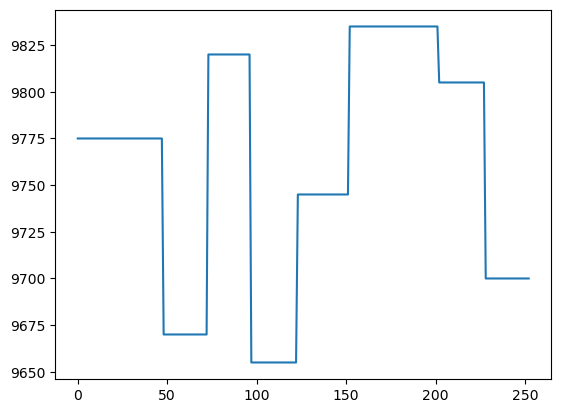

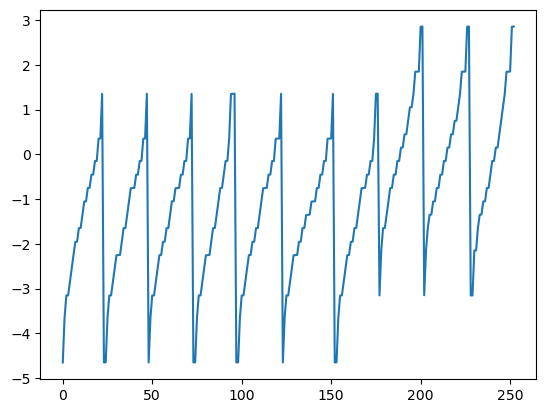

149


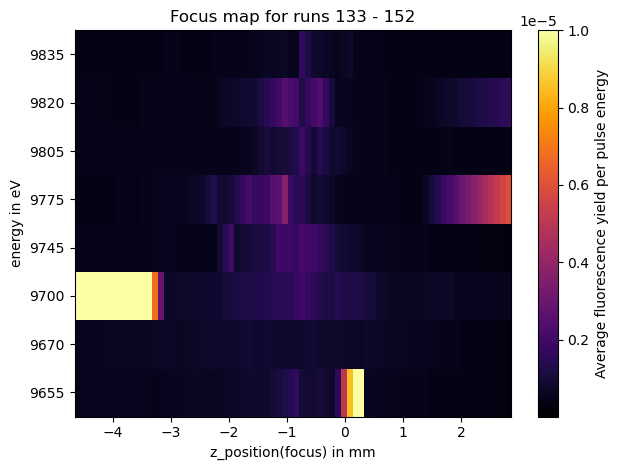

In [3]:
from pathlib import Path
from scipy.interpolate import interp1d

path = dh.expPath+'Results/FocusScans/Data/'
directory=Path(path)

runs = np.arange(133, 153)
format_runs = [dh.run_format(r) for r in runs]
#print(format_runs)

#files = [file.name for file in sorted(directory.glob('fyield_*.h5'), reverse=False) if int(file.name.split('_')[1][1:5]) in runs]
files = [file.name for file in sorted(directory.glob('fyield_*n100.h5'), reverse=False) if int(file.name.split('_')[1][1:5]) in runs]
#files = [file.name for file in sorted(directory.glob('fyield_*n200.h5'), reverse=False) if int(file.name.split('_')[1][1:5]) in runs]
#files = [file.name for file in sorted(directory.glob('fyield_*n300.h5'), reverse=False) if int(file.name.split('_')[1][1:5]) in runs]
#print(files)
nshot=files[0].split('_')[5][1:4]
loaded_runs = [int(file.split('_')[1][1:5]) for file in files]
print('Loaded runs: {}'.format(loaded_runs))

f_yield = []
for file in files:
    df = pd.read_hdf(path+file, ignore_index=True)
    f_yield.append(df)

df = pd.concat(f_yield, ignore_index=True)
print(df)
df['photon_energy'].plot()
plt.show()
df['injector_pos'].plot()
plt.show()

energies = sorted(df['photon_energy'].unique())
z_pos = sorted(df['injector_pos'].unique())
print(len(z_pos))
min_z = min(z_pos)
max_z = max(z_pos)
# Step 1: Define common z positions (e.g., using the union of all z values or a uniform grid)
common_z = np.linspace(min_z, max_z, int(len(z_pos)*0.5))
interp_list = []

for energy in sorted(df['photon_energy'].unique()):
    df_e = df[df['photon_energy']==energy]
    z_tmp = df_e['injector_pos'].to_numpy()
    f_tmp = df_e['f_yield_ROI0'].to_numpy()
    if len(df_e['injector_pos'].unique())<3: continue
    # Step 2: Interpolate each array to the common z grid
    interp_list.append(interp1d(z_tmp, f_tmp, kind='linear', fill_value="extrapolate")(common_z))
    
# Step 3: Stack the arrays into a 2D matrix
data = np.vstack(interp_list)

plt.imshow(data, aspect='auto', cmap='inferno', vmin=1e-8, vmax=1e-5, origin='lower', extent=[common_z[0], common_z[-1], 0, len(data)], interpolation=None)
plt.colorbar(label='Average fluorescence yield per pulse energy')
plt.title('Focus map for runs {} - {}'.format(runs[0], runs[-1]))
plt.yticks(np.arange(len(data))+0.5, energies[:len(data)])
plt.ylabel('energy in eV')
plt.xlabel('z_position(focus) in mm')
plt.tight_layout()
if False: plt.savefig(dh.expPath+'Results/FocusScans/FocusMaps/overview_runs{}_{}_n{}.png'.format(runs[0], runs[-1], nshot), format='png')
plt.show()

In [68]:
int('0016')[]
[]

16

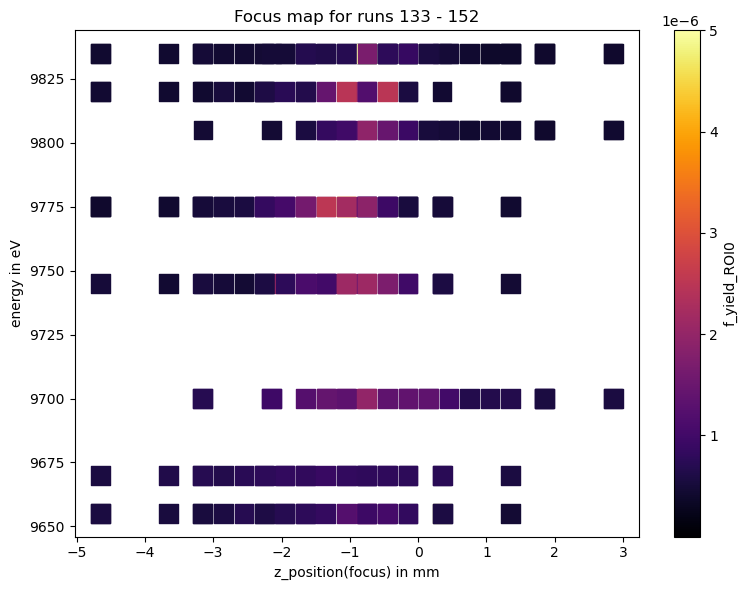

In [18]:
# Erstelle den Scatter-Plot und setze min und max für die Farbskala
plt.figure(figsize=(8, 6))

# Definiere manuelle min/max-Werte für die Farbskala
vmin = 5e-6  # Beispiel für das minimale f_yield_ROI0
vmax = 1e-9  # Beispiel für das maximale f_yield_ROI0

sc = plt.scatter(df['injector_pos'], df['photon_energy'], marker='s', c=df['f_yield_ROI0'], cmap='inferno', s=180, vmin=vmin, vmax=vmax)

# Füge eine Farbleiste hinzu
plt.colorbar(sc, label='f_yield_ROI0')

plt.title('Focus map for runs {} - {}'.format(runs[0], runs[-1]))
#plt.yticks(np.arange(len(data))+0.5, energies[:len(data)])
plt.ylabel('energy in eV')
plt.xlabel('z_position(focus) in mm')
plt.tight_layout()

# Zeige den Plot
plt.show()

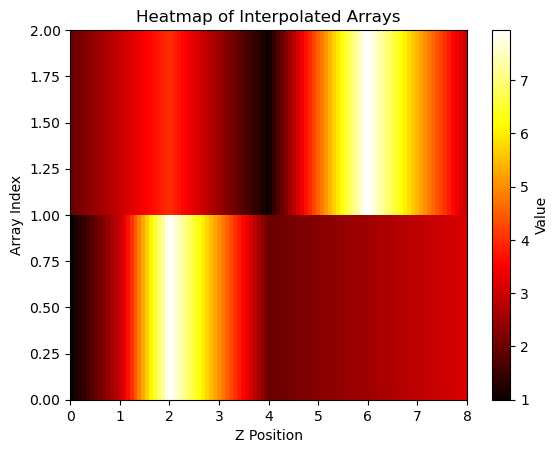

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Example arrays (with different z positions)
z1 = np.array([0, 1, 2, 4, 3, 7.5])
arr1 = np.array([1, 3, 8, 2, 5, 3])

z2 = np.array([0, 2, 4, 6, 8])
arr2 = np.array([2, 4, 1, 8, 3])

# Step 1: Define common z positions (e.g., using the union of all z values or a uniform grid)
common_z = np.linspace(min(np.min(z1), np.min(z2)), max(np.max(z1), np.max(z2)), 100)

# Step 2: Interpolate each array to the common z grid
interp_arr1 = interp1d(z1, arr1, kind='linear', fill_value="extrapolate")(common_z)
interp_arr2 = interp1d(z2, arr2, kind='linear', fill_value="extrapolate")(common_z)

# Step 3: Stack the arrays into a 2D matrix
data = np.vstack([interp_arr1, interp_arr2])

# Step 4: Plot the heatmap
plt.imshow(data, aspect='auto', cmap='hot', origin='lower', extent=[common_z[0], common_z[-1], 0, len(data)])
plt.colorbar(label='Value')
plt.xlabel('Z Position')
plt.ylabel('Array Index')
plt.title('Heatmap of Interpolated Arrays')
plt.show()


99.94% of the data of run 134 is used!


<extra_data.DataCollection for 27 sources and 6400 trains>

In [ ]:
plt.pcolormesh()